## Analytics of COVID-19 pandemic in Malaysia

This notebook provides an analytical tool to assess the COVID-19 pandemic in Malaysia in detail. 

In particular, the vaccine effectiveness of Pfizer-BioNTech, Oxford-AstraZeneca and Sinovac are assessed in detail.

Created by: Roger Teoh

#### Load dataset  

In [1]:
from analytics.linelists import Linelists

linelists = Linelists()

In [2]:
linelists.last_updated

Timestamp('2021-12-03 00:00:00')

In [3]:
t_start = "2021-07-01"
t_end = "2021-12-01"

### Breakdown of daily cases by age group 

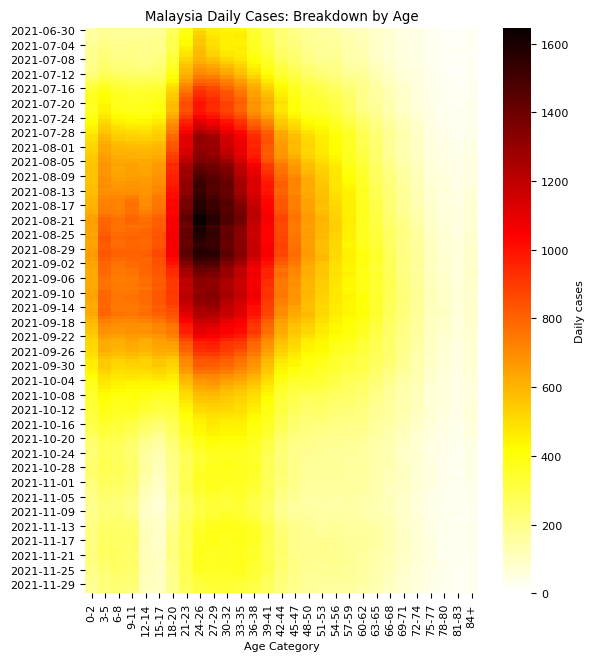

In [4]:
linelists.plot_cases_by_age_group(t_start, t_end, bin_size=3)

### Breakthrough cases by vaccine type 

- Metric: cases per 100,000 people
- Oxford-AstraZeneca set to NaN before 1-Aug-2021 due to small sample size

In [5]:
df_breakthrough_cases = linelists.get_breakthrough_cases_time_series(
    t_start, t_end, moving_average=7
)

df_breakthrough_cases.tail()

,Unvaccinated,Pfizer-BioNTech,Oxford-AstraZeneca,Sinovac
2021-11-27,19.208904,13.519287,17.987290,19.207220
2021-11-28,18.995588,13.348012,17.567536,18.777037
2021-11-29,18.723439,13.020361,17.376248,18.295556
2021-11-30,18.232302,12.840701,17.104151,17.888306
2021-12-01,18.123939,12.770201,16.817705,17.661287


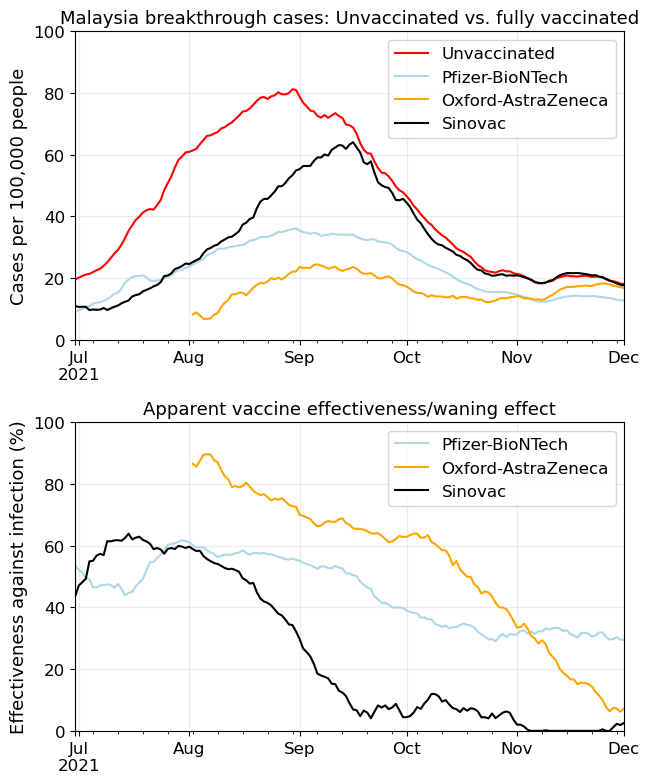

In [7]:
linelists.plot_breakthrough_cases_time_series(t_start, t_end, moving_average=7)

### Breakthrough deaths by vaccine type 

- Metric: deaths per 100,000 people
- Oxford-AstraZeneca set to NaN before 15-Aug-2021 due to small sample size

In [8]:
df_breakthrough_deaths = linelists.get_breakthrough_deaths_time_series(
    t_start, t_end, moving_average=7
)

df_breakthrough_deaths.tail()

,Unvaccinated,Pfizer-BioNTech,Oxford-AstraZeneca,Sinovac
2021-11-27,0.238597,0.076899,0.063974,0.160276
2021-11-28,0.228273,0.074571,0.063950,0.157349
2021-11-29,0.228426,0.073319,0.063950,0.155872
2021-11-30,0.211791,0.068802,0.078132,0.147181
2021-12-01,0.199299,0.057784,0.070991,0.144267


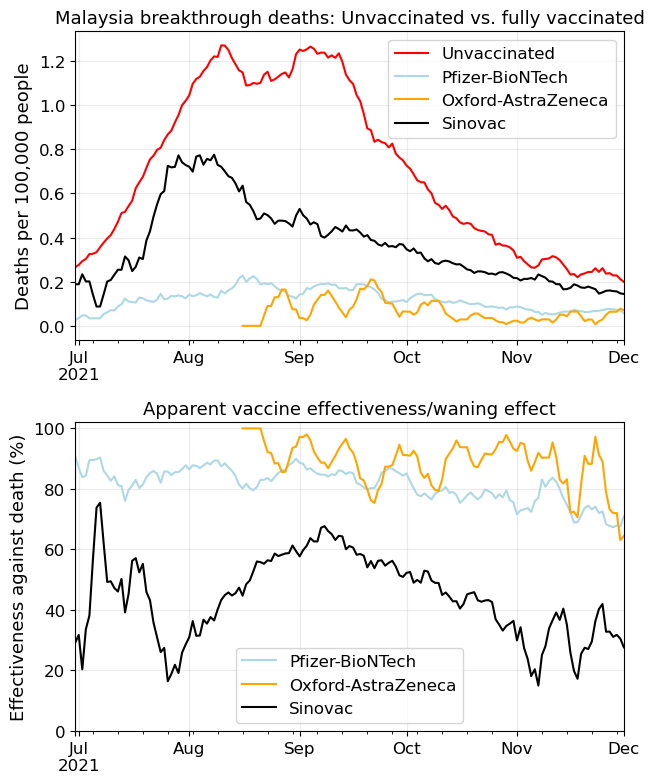

In [9]:
linelists.plot_breakthrough_deaths_time_series(t_start, t_end, moving_average=7)

### Breakthrough deaths by age and vaccine type 

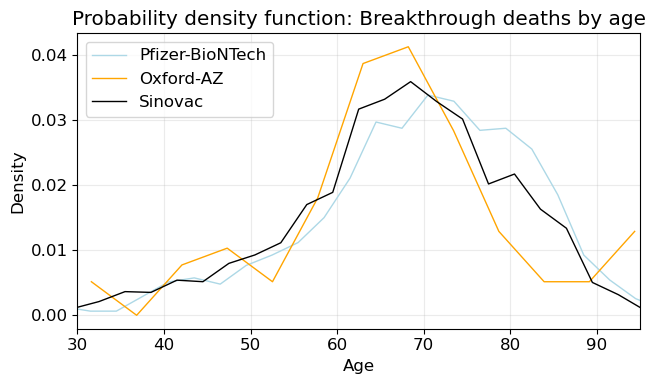

In [12]:
linelists.plot_breakthrough_deaths_pdf_by_age(density=True)

### Vaccinations 

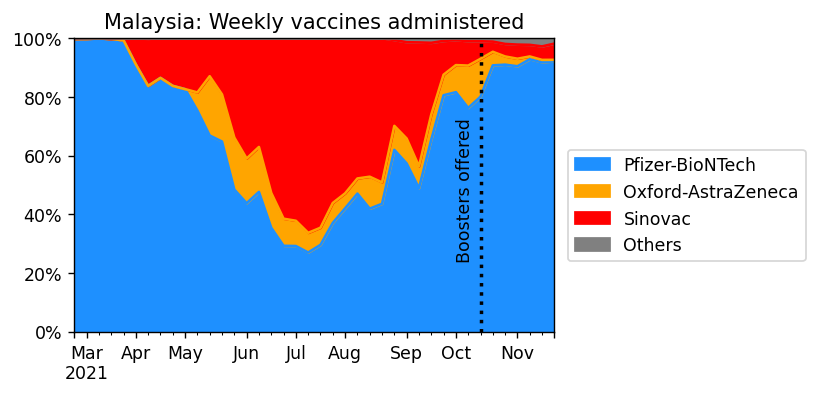

In [1]:
from analytics.vaccinations import Vaccinations

vaccinations = Vaccinations()
vaccinations.plot_daily_vaccines_administered(percentage=True)

### Weekly deaths by vaccination status

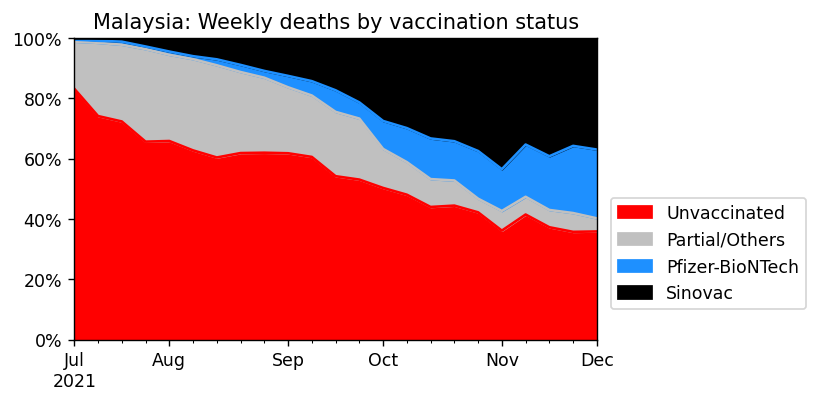

In [4]:
linelists.plot_deaths_by_vaccination_status(t_start, t_end, percentage=True)

In [5]:
linelists.get_death_statistics_by_vax_status(past_n_days=14)

In between 2021-11-20 and 2021-12-03:
   - 20.8% of the unvaccinated population accounted for 36.0% of all deaths
   - 40.4% of population that received the Pfizer-BioNTech vaccine accounted for 22.3% of all deaths
   - 30.4% of population that received the Sinovac vaccine accounted for 35.8% of all deaths


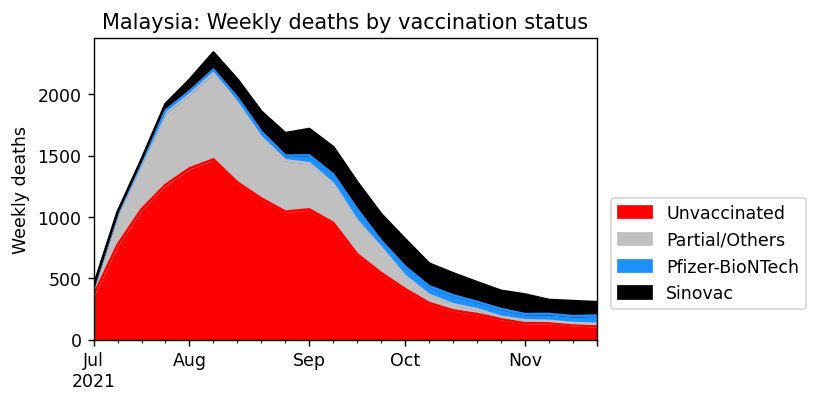

In [6]:
linelists.plot_deaths_by_vaccination_status(t_start, t_end, percentage=False)